In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [97]:
## reading data - information
data = pd.read_csv('datasets/merged_data.txt', sep=" ", header=None)
data.columns = ["Y", "X"]
data
data.to_csv ('datasets/data.csv', index=None)
print(data.head())


        Y       X
0  5.1627  2.0243
1  4.3093  1.5470
2  3.7513  1.3042
3  3.1206  1.2382
4  2.7733  1.1511


In [87]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692 entries, 0 to 691
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Y       692 non-null    float64
 1   X       692 non-null    float64
dtypes: float64(2)
memory usage: 10.9 KB


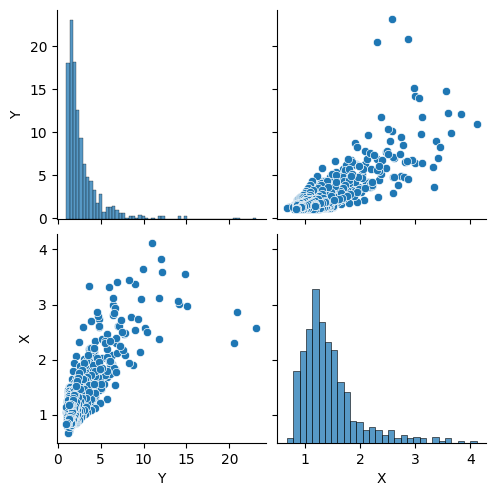

In [88]:
sns.pairplot(data)

In [89]:
features =  data[['X']]
lables =  data[['Y']]
X = features 
y = lables

In [90]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [91]:
from sklearn.svm import SVR
##PLAY WITH  c and epsilon
model_svr = SVR(kernel='rbf', C=20, epsilon=0.3)
model_svr.fit(X_train, y_train)

e:\Kunal_Barve_Task\ML_Tasks\ml_env\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=20, epsilon=0.3)

In [96]:
y_pred_test = model_svr.predict(X_test)
y_pred_train = model_svr.predict(X_train)
y_pred_orginal = model_svr.predict(X)
########
# Print the predicted output, R-squared
print('r2_score_test:',r2_score(y_test, y_pred_test))
print('r2_score_train:',r2_score(y_train, y_pred_train))
print('r2_score_orginal:',r2_score(y, y_pred_orginal))



r2_score_test: 0.5936860250103085
r2_score_train: 0.5677285714202209
r2_score_orginal: 0.5779814652663983


In [94]:
## Testing
X_new = np.linspace(0.5, 4, 692).reshape(-1, 1)
y_pred_new = model_svr.predict(X_new)

e:\Kunal_Barve_Task\ML_Tasks\ml_env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


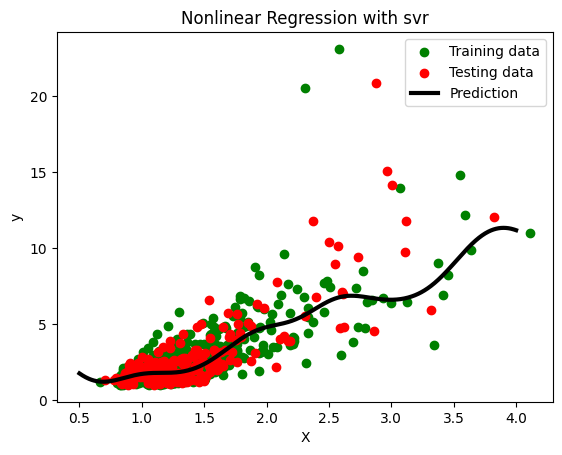

In [95]:

####plots
plt.scatter(X_train, y_train, color='green', label='Training data')
plt.scatter(X_test, y_test, color='red', label='Testing data')
plt.plot(X_new, y_pred_new, color='black', linewidth=3, label='Prediction')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Nonlinear Regression with svr')
plt.legend()
plt.show()